In [2]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
def get_codon_usage(file):
    record = SeqIO.read(file, "fasta")
    seq = str(record.seq)
    codon_count = {}
    for i in range(0, len(seq) -2, 3):
        codon = seq[i:i+3]
        if len(codon) == 3:
            codon_count[codon] = codon_count.get(codon, 0) + 1
    return codon_count

In [6]:
def plot_codon_usage(codon_count, gene_name):
    codons = list(codon_count.keys())
    freqs = list(codon_count.values())
    plt.figure(figsize=(14, 5))
    plt.bar(codons, freqs)
    plt.title(f"Codon Usage in {gene_name}")
    plt.xlabel("Codon")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f"{gene_name}_codon_usage.png")
    plt.show()

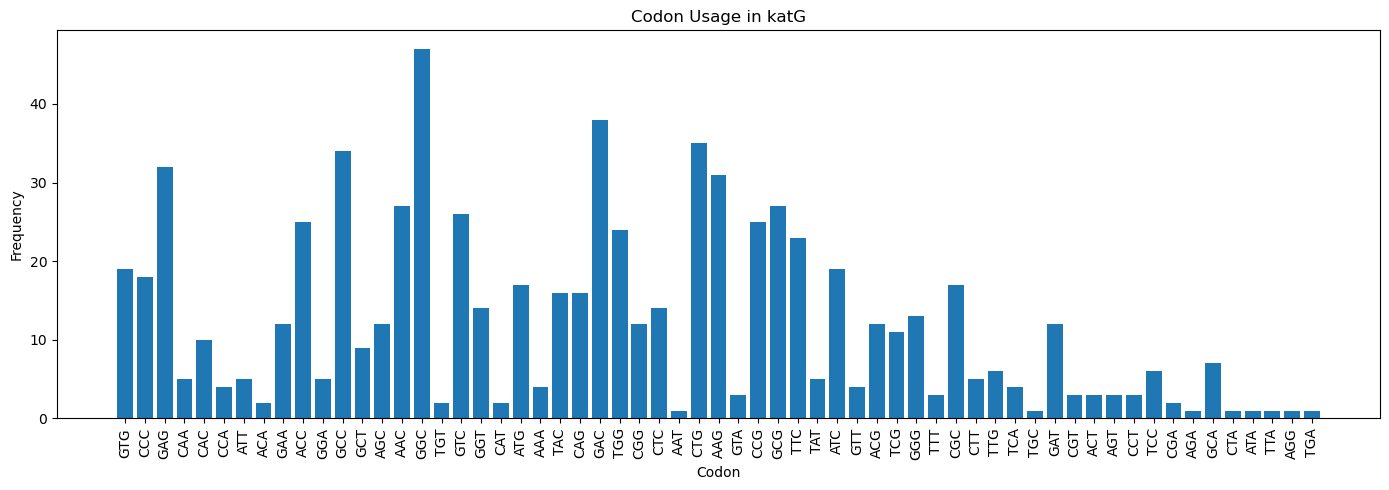

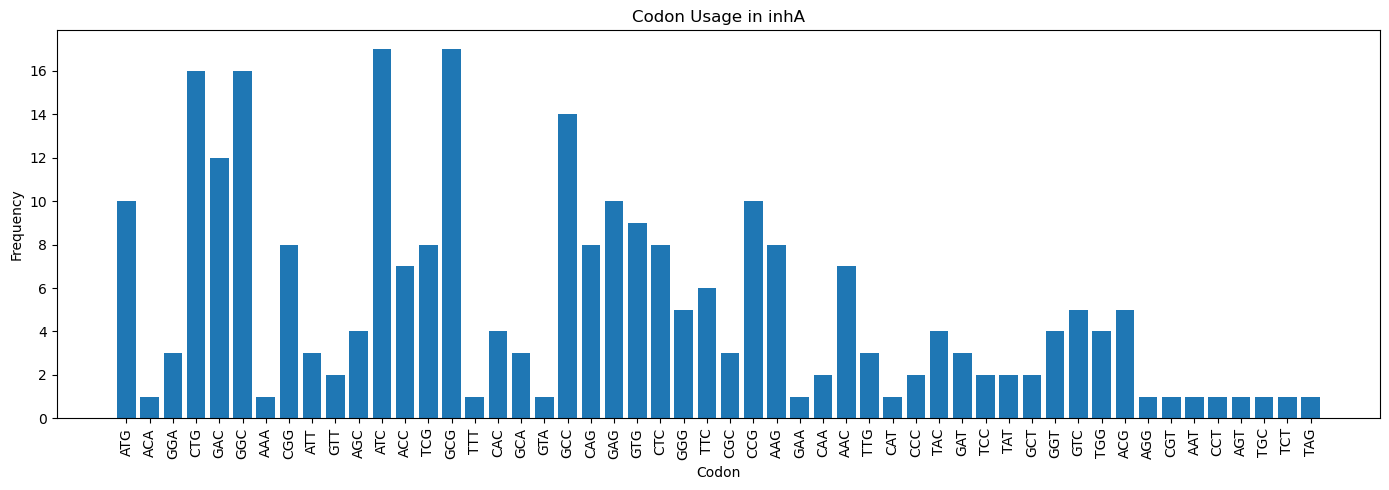

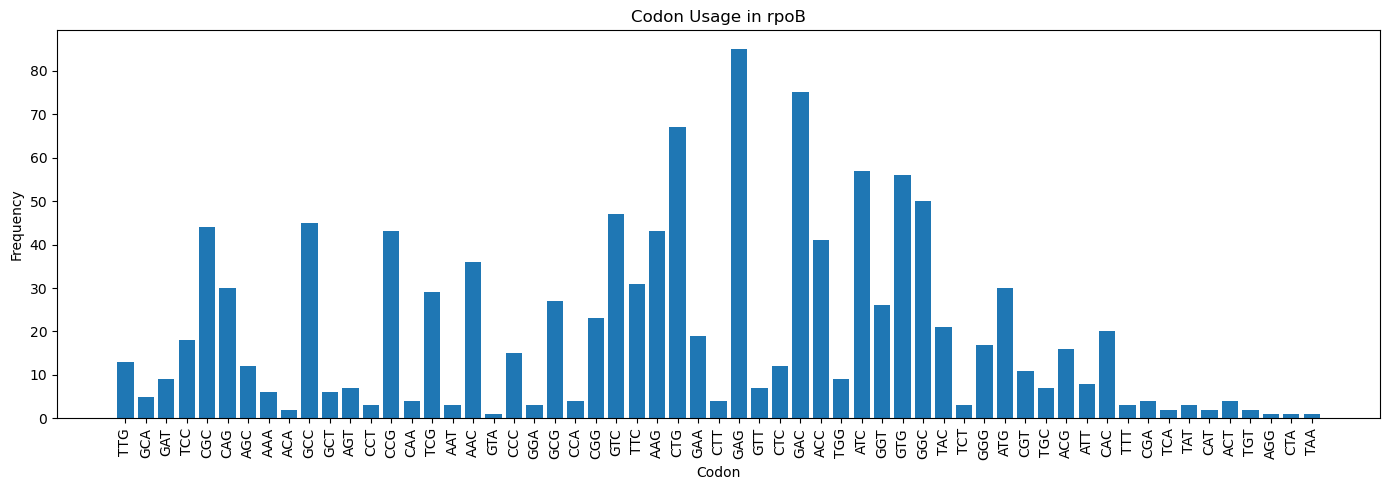

In [14]:
def save_codon_usage_csv(codon_count, gene_name):
    df = pd.DataFrame(list(codon_count.items()), columns=["Codon", "Frequency"])
    df.to_csv(f"{gene_name}_codon_usage.csv", index=False)
genes = [
    ("katG.fasta.txt", "katG"),
    ("inhA.fasta.txt", "inhA"),
    ("rpoB.fasta.txt", "rpoB")
]
for file, gene in genes:
    codon_count = get_codon_usage(file)
    plot_codon_usage(codon_count, gene)
    save_codon_usage_csv(codon_count, gene)